In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 500)

In [3]:
# Reading the dataset and looking at the first 5 rows
credit = pd.read_csv("credit_card.csv")
credit.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [36]:
credit.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,RISK_VALUE,BILL_VALUE
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,-3102
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,-11395
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,-66396
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,-176956
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,-42352
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,0,-166742
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,0,-2189641
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,-3,1639
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,2,-48166
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,-10,-12790


### Name	Description
1. ID	ID of each client
2. LIMIT_BAL	Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- SEX	Gender (1=male, 2=female)
- EDUCATION	(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE	Marital status (1=married, 2=single, 3=others)
- AGE	Age in years
- PAY_1	Repayment status in September, 2005 (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for   one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2	Repayment status in August, 2005 (scale same as above)
- PAY_3	Repayment status in July, 2005 (scale same as above)
- PAY_4	Repayment status in June, 2005 (scale same as above)
- PAY_5	Repayment status in May, 2005 (scale same as above)
- PAY_6	Repayment status in April, 2005 (scale same as above)
- BILL_AMT1	Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2	Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3	Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4	Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5	Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6	Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1	Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2	Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3	Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4	Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5	Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6	Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month	Default payment (1=yes, 0=no)

In [7]:
# Checking the shape of dataframe
credit.shape

(30000, 25)

In [4]:
# Column names
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [5]:
# Renaming the column names with their corresponding month
credit.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                  'PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR',
                 'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
                 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
                 'DEFAULT']

In [6]:
# Checking the column name after renaming them
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEP',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'DEFAULT'],
      dtype='object')

In [8]:
# Checking for null values in the dataset
credit.isnull().sum()

ID              0
LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_SEP         0
PAY_AUG         0
PAY_JUL         0
PAY_JUN         0
PAY_MAY         0
PAY_APR         0
BILL_AMT_SEP    0
BILL_AMT_AUG    0
BILL_AMT_JUL    0
BILL_AMT_JUN    0
BILL_AMT_MAY    0
BILL_AMT_APR    0
PAY_AMT_SEP     0
PAY_AMT_AUG     0
PAY_AMT_JUL     0
PAY_AMT_JUN     0
PAY_AMT_MAY     0
PAY_AMT_APR     0
DEFAULT         0
dtype: int64

In [9]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID              30000 non-null int64
LIMIT_BAL       30000 non-null int64
SEX             30000 non-null int64
EDUCATION       30000 non-null int64
MARRIAGE        30000 non-null int64
AGE             30000 non-null int64
PAY_SEP         30000 non-null int64
PAY_AUG         30000 non-null int64
PAY_JUL         30000 non-null int64
PAY_JUN         30000 non-null int64
PAY_MAY         30000 non-null int64
PAY_APR         30000 non-null int64
BILL_AMT_SEP    30000 non-null int64
BILL_AMT_AUG    30000 non-null int64
BILL_AMT_JUL    30000 non-null int64
BILL_AMT_JUN    30000 non-null int64
BILL_AMT_MAY    30000 non-null int64
BILL_AMT_APR    30000 non-null int64
PAY_AMT_SEP     30000 non-null int64
PAY_AMT_AUG     30000 non-null int64
PAY_AMT_JUL     30000 non-null int64
PAY_AMT_JUN     30000 non-null int64
PAY_AMT_MAY     30000 non-null int64
PAY_AMT_APR     30000 non-null int64
DEF

* There are 25 columns

## Univariate analysis

In [7]:
def univariate(df):
    cols_int = list(df.select_dtypes("int64").columns) # extracting integer columns
    #int_cols = cols_int # copy it in another list which we can alter and this will finally become our int continuous var list
    cols_cat = list(df.select_dtypes(["object","category"]).columns) # cats
    cat_cols = cols_cat  # cats
    cols_float = list(df.select_dtypes("float64").columns) # float
    #float_cols = cols_float  # float
    cont_cols = []
    cats_anomaly = [] # cats which have alot of unique values
    if len(cols_int)>0:
        for i in range(len(cols_int)):
            unique = list(df[cols_int[i]].unique())
            if len(unique)<=11:
                cat_cols.append(cols_int[i])
                # int_cols.remove(cols_int[i])
            else:
                cont_cols.append(cols_int[i])
    if len(cols_float)>0:
        for i in range(len(cols_float)):
            
            if len(list(df[cols_float[i]].unique()))<=11:
                cat_cols.append(cols_float[i])
                #float_cols.remove(cols_float[i])
            else:
                cont_cols.append(cols_float[i])
    if len(cols_cat)>0:
        for i in range(len(cols_cat)):
            if ((len(list(df[cols_cat[i]].unique())))>=15):
                #cat_cols.remove(cols_cat[i])
                cats_anomaly.append(cols_cat[i])
    # Finding the size of figure and matrix
    if len(cat_cols)>0:
        if len(cat_cols)%3==0:
            a = len(cat_cols)//3
        else:
            a = 1 + len(cat_cols)//3
        b = a*5
        # plotting the cat vars
        plt.figure(figsize = (15,b))
        for i in range(len(cat_cols)):
            plt.subplot(a,3,i+1)
            sns.countplot(df[cat_cols[i]].dropna())
    s1 = plt.show()
    # Finding the size of figure and matrix
    if len(cont_cols)>0:
        if len(cont_cols)%3==0:
            a = len(cont_cols)//3
        else:
            a = 1 + len(cont_cols)//3
        b = a*5
        # plotting the cont vars
        plt.figure(figsize = (15,b))
        for i in range(len(cont_cols)):
            plt.subplot(a,3,i+1)
            sns.distplot(df[cont_cols[i]].dropna())
    s2 = plt.show()
    
    return print(cats_anomaly), s1, s2 

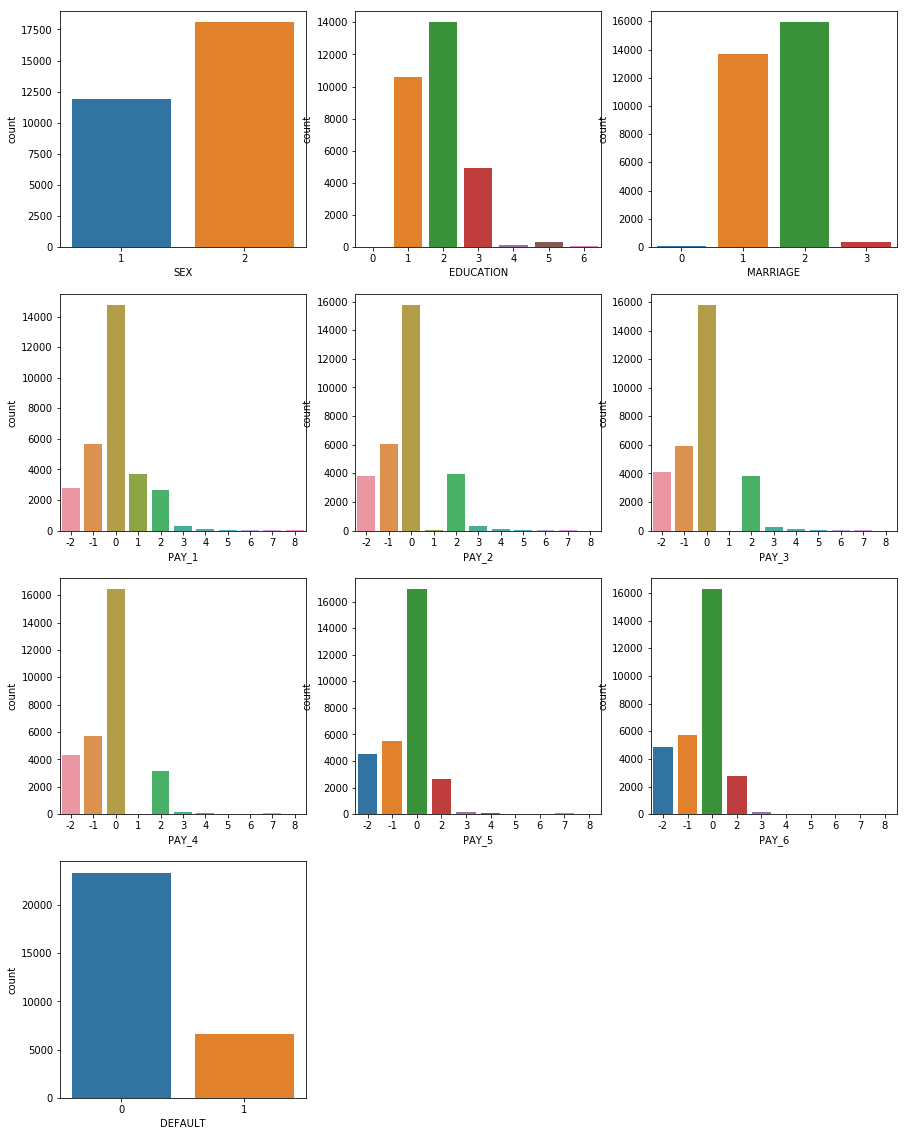

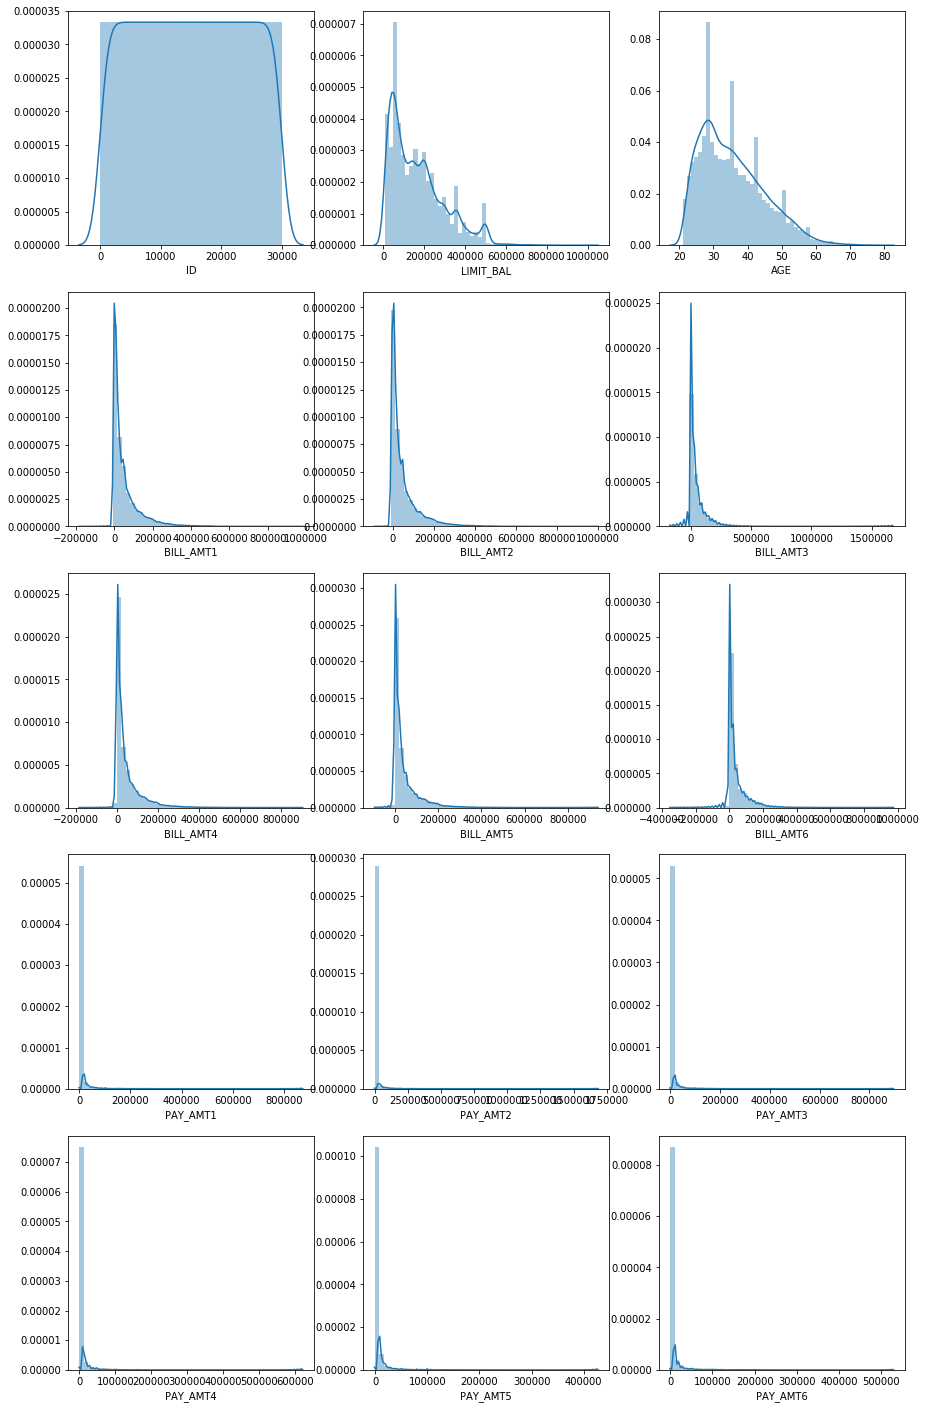

[]


(None, None, None)

In [8]:
univariate(credit)

1. SEX has two categories 1 and 2. Sex 1 is about 40 % and Sex 2 is about 60% of the total counts.
2. In education category; most of the values belongs to 1,2 and 3 only. Rest 0,4,5 and 6 are negligible.
3. MARRIAGE; Most of the values belongs to 1 and 2. 0 and 3 are negligible in number.
4. PAY_1, PAY_2, PAY_3, PAY_4, PAY_5 and PAY_6 columns; 0 occured most of the time.
5. **TARGET Variable** ***DEFAULT*** is little imbalanced. About 20% of the customers defaulted.
6. **ID** Identification of the customer. Not of much use.
7. **LIMIT_BAL** Data is right skewed and there are few peaks in between. These peaks signifies that here most of the balances are in round figures because limited balance is not like 23,789. Most of the times it is in round figures like in thousands or lacs.
8. **AGE** column is also a little right skewed. There are few peaks ***that we should see why they are there.***
- **PAY_AMT** are all extremely right skewed. ***OUTLIERS***
## Anomaly
9. **Bill_AMT** columns have negative amounts.

##### Bill_AMT: This column is the bill generated in your in that particular month. 
Note: Negative values in this Bill amount are for the ones when a customer paid more than bill so gets extra credit balance which he/she can use.

In [13]:
# Make a new column which will define the risk value of the customer
credit['RISK_VALUE'] = credit['PAY_APR'] + credit['PAY_MAY'] + credit['PAY_JUN'] + credit['PAY_JUL'] + credit['PAY_AUG'] + credit['PAY_SEP']

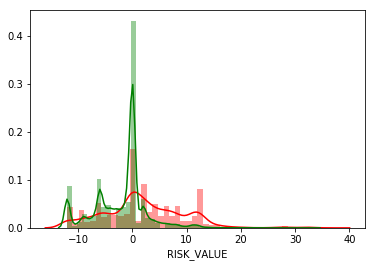

In [15]:
sns.distplot(credit[credit['DEFAULT']==1]['RISK_VALUE'], color = 'r')
sns.distplot(credit[credit['DEFAULT']==0]['RISK_VALUE'], color = 'g')

In [24]:
credit['BILL_VALUE'] = ((credit['PAY_AMT_MAY'] - credit['BILL_AMT_APR']) + (credit['PAY_AMT_JUN'] - credit['BILL_AMT_MAY'])+
                       (credit['PAY_AMT_JUL'] - credit['BILL_AMT_JUN']) + (credit['PAY_AMT_AUG'] - credit['BILL_AMT_JUL'])+
                       (credit['PAY_AMT_SEP'] - credit['BILL_AMT_AUG']))

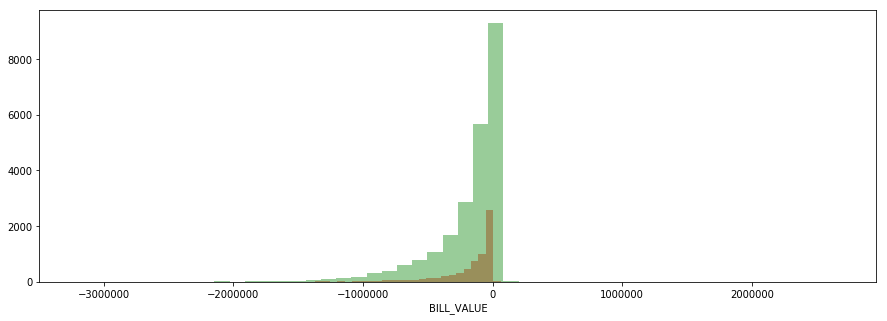

In [29]:
plt.figure(figsize = (15,5))
sns.distplot(credit[credit['DEFAULT']==1]['BILL_VALUE'], color = 'r', kde = False)
sns.distplot(credit[credit['DEFAULT']==0]['BILL_VALUE'], color = 'g', kde = False)

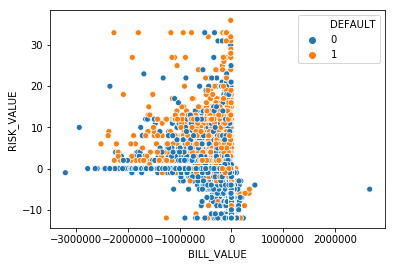

In [32]:
sns.scatterplot(credit['BILL_VALUE'], credit['RISK_VALUE'], hue = credit['DEFAULT'])

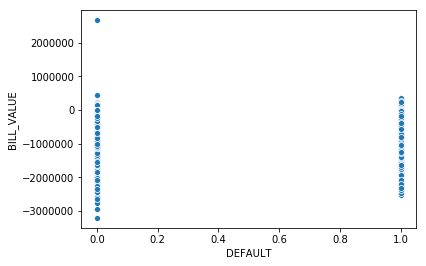

In [34]:
sns.scatterplot(y = credit['BILL_VALUE'], x = credit['DEFAULT'])

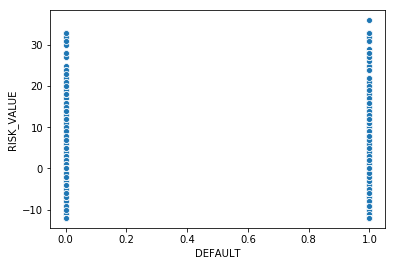

In [35]:
sns.scatterplot(y = credit['RISK_VALUE'], x = credit['DEFAULT'])

In [31]:
credit['BILL_VALUE'].corr(credit['RISK_VALUE'])

-0.3127433500927871

## Bivariate

In [26]:
# Bivariate analysis with Target variable
def bivariate(df, target):
    cols_int = list(df.select_dtypes("int64").columns) # extracting integer columns
    #int_cols = cols_int # copy it in another list which we can alter and this will finally become our int continuous var list
    cols_cat = list(df.select_dtypes(["object","category"]).columns) # cats
    cat_cols = cols_cat  # cats
    cols_float = list(df.select_dtypes("float64").columns) # float
    #float_cols = cols_float  # float
    cont_cols = []
    cats_anomaly = [] # cats which have alot of unique values
    if len(cols_int)>0:
        for i in range(len(cols_int)):
            unique = list(df[cols_int[i]].unique())
            if len(unique)<=11:
                cat_cols.append(cols_int[i])
                # int_cols.remove(cols_int[i])
            else:
                cont_cols.append(cols_int[i])
    if len(cols_float)>0:
        for i in range(len(cols_float)):
            
            if len(list(df[cols_float[i]].unique()))<=11:
                cat_cols.append(cols_float[i])
                #float_cols.remove(cols_float[i])
            else:
                cont_cols.append(cols_float[i])
    if len(cols_cat)>0:
        for i in range(len(cols_cat)):
            if ((len(list(df[cols_cat[i]].unique())))>=15):
                #cat_cols.remove(cols_cat[i])
                cats_anomaly.append(cols_cat[i])
    # Finding the size of figure and matrix
    if len(cat_cols)>0:
        if len(cat_cols)%3==0:
            a = len(cat_cols)//3
        else:
            a = 1 + len(cat_cols)//3
        b = a*5
        # plotting the cat vars
        plt.figure(figsize = (15,b))
        for i in range(len(cat_cols)):
            plt.subplot(a,3,i+1)
            print(df.groupby(target)[i].value_counts(normalize = True)*100)
            sns.countplot(df[cat_cols[i]].dropna(), hue = df[target])
    s1 = plt.show()
    # Finding the size of figure and matrix
    if len(cont_cols)>0:
        if len(cont_cols)%3==0:
            a = len(cont_cols)//3
        else:
            a = 1 + len(cont_cols)//3
        b = a*5
        # plotting the cont vars
        plt.figure(figsize = (15,b))
        for i in range(len(cont_cols)):
            plt.subplot(a,3,i+1)
            sns.distplot(df[df[target]==df[target].unique()[1]][cont_cols[i]].dropna(), color = 'r')
            sns.distplot(df[df[target]==df[target].unique()[0]][cont_cols[i]].dropna(), color = 'b')
    s2 = plt.show()
    
    return print(cats_anomaly), s1, s2

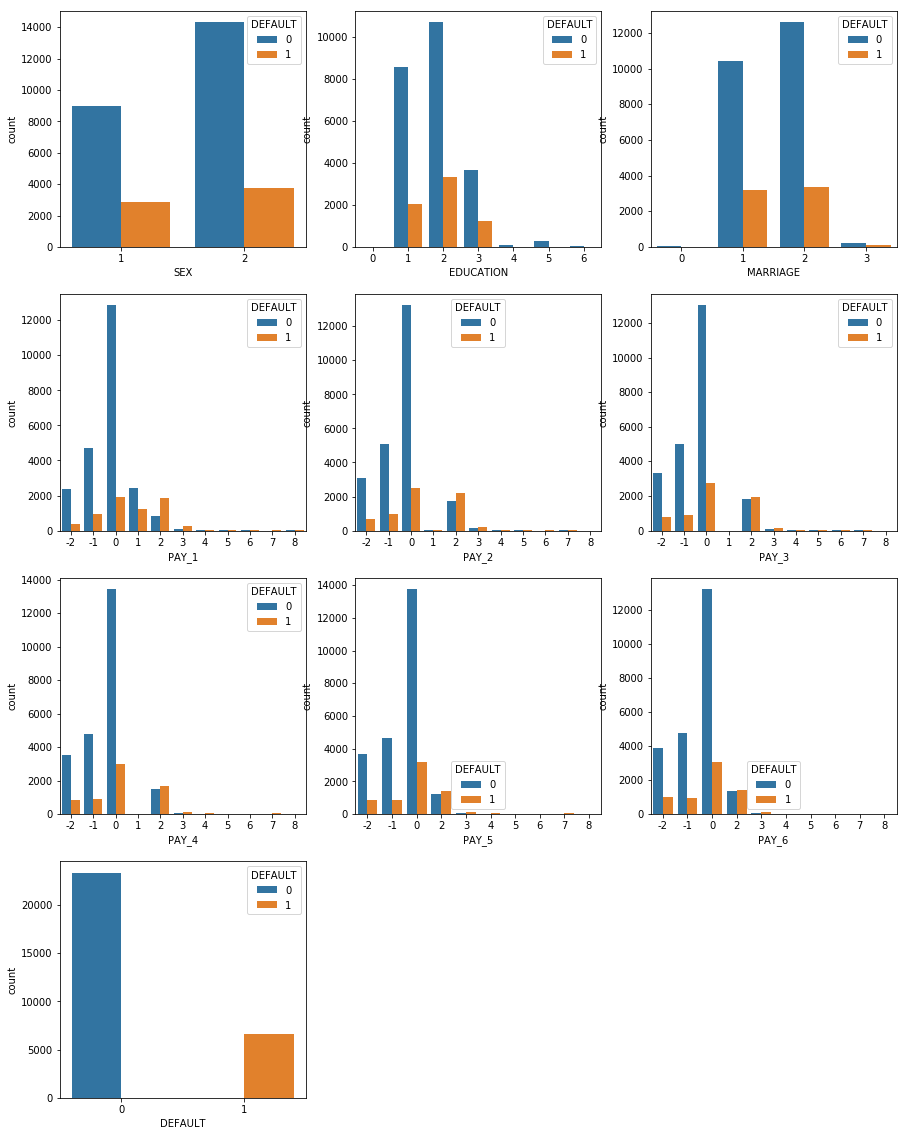

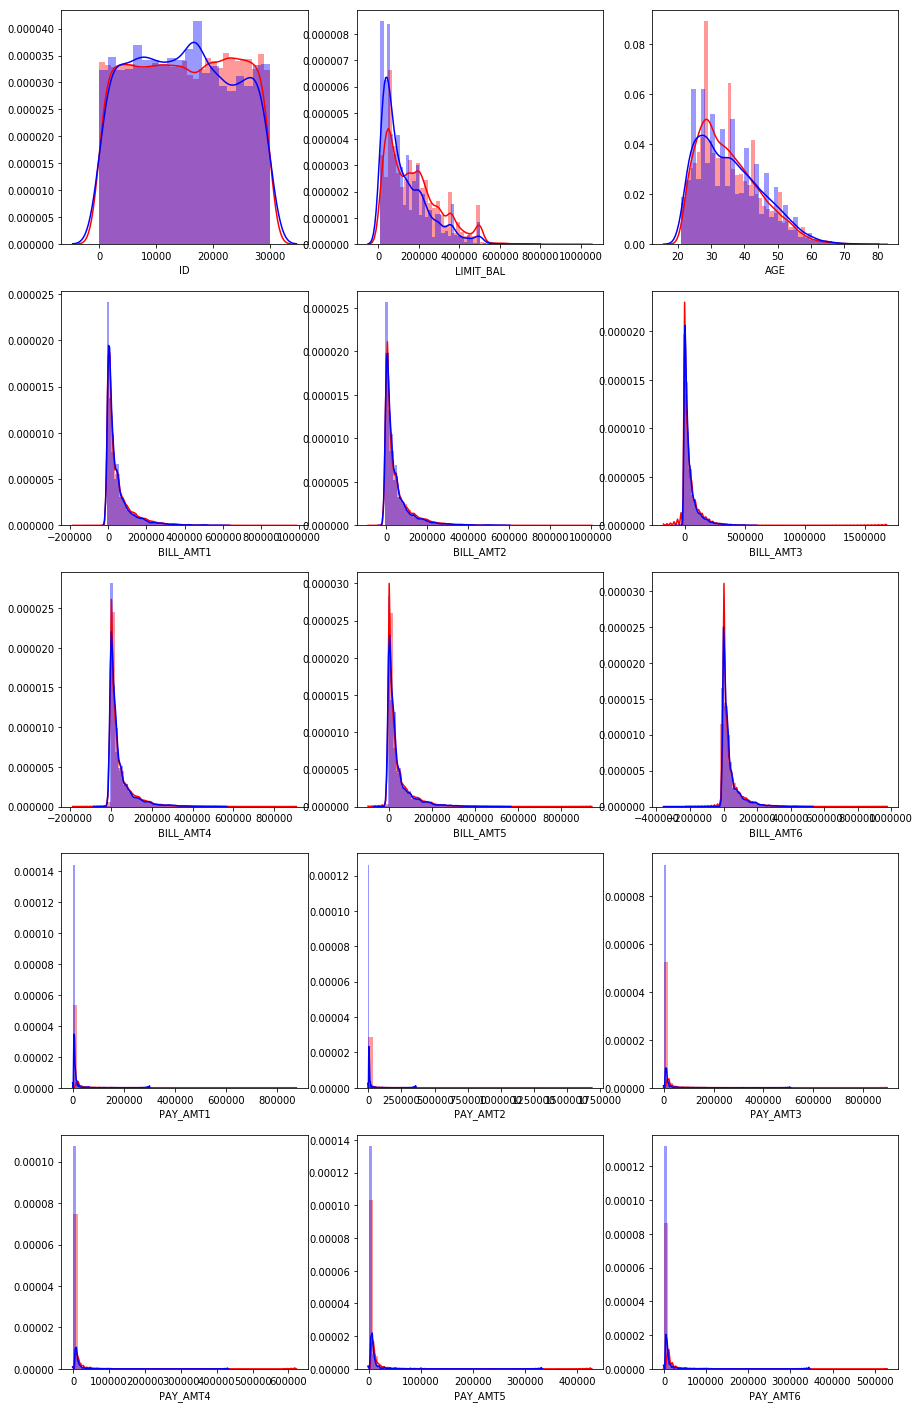

[]


(None, None, None)

In [11]:
# Input the data name and the target variable. This will work only if your target is categorical with two values 0 and 1
bivariate(credit, "DEFAULT")

1. Sex is equally distributed

In [39]:
print(credit.groupby('DEFAULT')['MARRIAGE'].value_counts(normalize = True)*100)

DEFAULT  MARRIAGE
0        2           54.027564
         1           44.739771
         3            1.022941
         0            0.209724
1        2           50.346594
         1           48.312236
         3            1.265823
         0            0.075347
Name: MARRIAGE, dtype: float64


In [39]:
# Comparision of MARRIAGE type 0, whether they will default or not
20/0.07

285.71428571428567

- In the data description there were only 3 categories in the Marriage(1 = Married, 2 = Single and 3 = others)
**As it can be seen above 0 Marraige category holds some importance, so not putting it with any other category. This might be possiple that someone just forgot to mention their Marital Status or they deliberatly did not mention that.**

In [46]:
credit['MARRIAGE'].replace([0,1,2,3], ['Unknown', 'Married', 'Single', 'Others'], inplace = True)

In [40]:
print(credit.groupby('DEFAULT')['EDUCATION'].value_counts(normalize = True)*100)

DEFAULT  EDUCATION
0        2            45.796953
         1            36.590481
         3            15.750728
         5             1.121383
         4             0.496490
         6             0.184044
         0             0.059921
1        2            50.180832
         1            30.681133
         3            18.640747
         5             0.271248
         6             0.120555
         4             0.105485
Name: EDUCATION, dtype: float64


In [44]:
# Let's assume that this 0 category in Education is also unkown as this is very less in number.
credit['EDUCATION'].replace([1,2,3,4,5,6,0], ['Graduate', 'University', 'High School', 'Others', 'Unknown',
                                                 'Unknown', 'Unknown'], inplace = True)

In [45]:
# Renaming category which are numerical in SEX
credit['SEX'].replace([1,2], ['Male', 'Female'], inplace = True)

DEFAULT  SEX
0        2      61.414997
         1      38.585003
1        2      56.705847
         1      43.294153
Name: SEX, dtype: float64
None


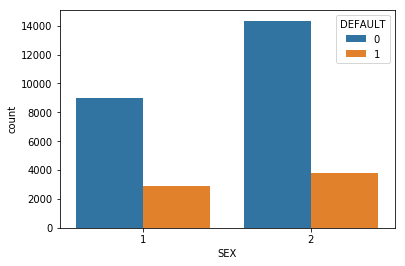

In [25]:
sns.countplot('SEX', hue = 'DEFAULT', data = credit)
print(print(credit.groupby('DEFAULT')['SEX'].value_counts(normalize = True)*100))
plt.show()

In [32]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

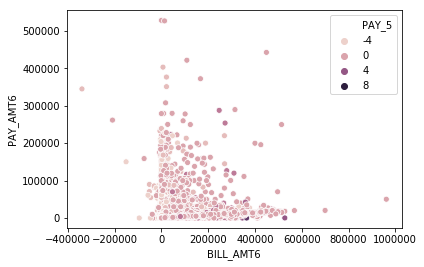

In [33]:

sns.scatterplot('BILL_AMT6', 'PAY_AMT6', hue = 'PAY_5', data = credit)

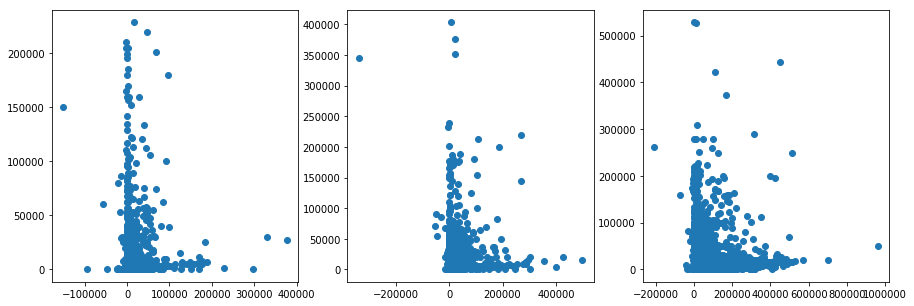

In [35]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.scatter(credit[credit['PAY_5']==-2]['BILL_AMT6'], credit[credit['PAY_5']==-2]['PAY_AMT6'])
plt.subplot(1,3,2)
plt.scatter(credit[credit['PAY_5']==-1]['BILL_AMT6'], credit[credit['PAY_5']==-1]['PAY_AMT6'])
plt.subplot(1,3,3)
plt.scatter(credit[credit['PAY_5']==0]['BILL_AMT6'], credit[credit['PAY_5']==0]['PAY_AMT6'])

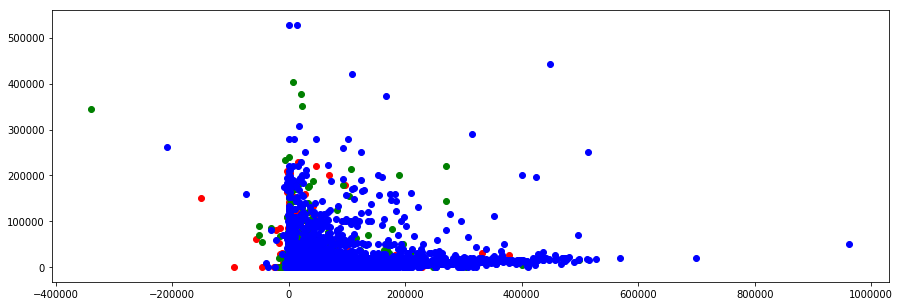

In [36]:
plt.figure(figsize = (15,5))
plt.scatter(credit[credit['PAY_5']==-2]['BILL_AMT6'], credit[credit['PAY_5']==-2]['PAY_AMT6'], color = 'r')
plt.scatter(credit[credit['PAY_5']==-1]['BILL_AMT6'], credit[credit['PAY_5']==-1]['PAY_AMT6'], color = 'g')
plt.scatter(credit[credit['PAY_5']==0]['BILL_AMT6'], credit[credit['PAY_5']==0]['PAY_AMT6'], color = 'b')

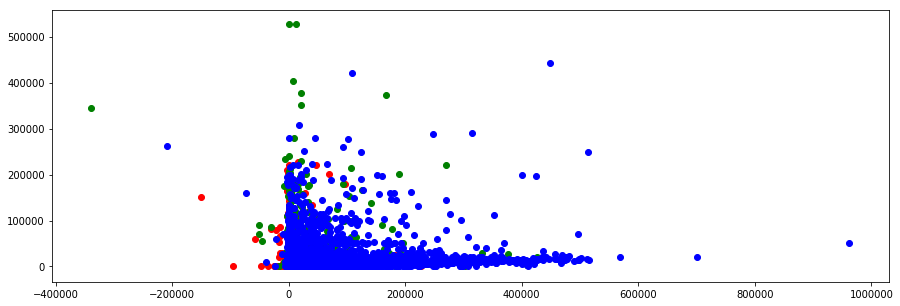

In [38]:
plt.figure(figsize = (15,5))
plt.scatter(credit[credit['PAY_6']==-2]['BILL_AMT6'], credit[credit['PAY_6']==-2]['PAY_AMT6'], color = 'r')
plt.scatter(credit[credit['PAY_6']==-1]['BILL_AMT6'], credit[credit['PAY_6']==-1]['PAY_AMT6'], color = 'g')
plt.scatter(credit[credit['PAY_6']==0]['BILL_AMT6'], credit[credit['PAY_6']==0]['PAY_AMT6'], color = 'b')

In [ ]:
credit.columns